#### Author: Neel Patel

In [244]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# pandas max cols
pd.set_option("display.max_columns", 25)

# plot style
plt.style.use("seaborn")

## Imports

In [245]:
df = pd.read_csv("../data/superstore.csv")

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [247]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [248]:
# converting dates
df["Order Date"] = df["Order Date"].astype("datetime64[ns]")
df["Ship Date"] = df["Ship Date"].astype("datetime64[ns]")

In [249]:
# removing few attributes
df.drop(columns=["Row ID", "Postal Code", "Product ID"], inplace=True)

## Final Data

In [260]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,sale_month_year
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016-11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016-11


## Stats

In [272]:
total_sales = round(df['Sales'].sum())
total_profit = round(df['Profit'].sum())
total_discount = round(df['Discount'].sum())
profit_per = round(df['Sales'].sum() / df['Profit'].sum())
print(f"Total Sales: {total_sales}")
print(f"Total Profit: {total_profit}")
print(f"Total Discounts Given: {total_discount}")
print(f"Store's Profit Earned: ~ {profit_per}%")


Total Sales: 2297201
Total Profit: 286397
Total Discounts Given: 1561
Store's Profit Earned: ~ 8%


## Sales Per Month

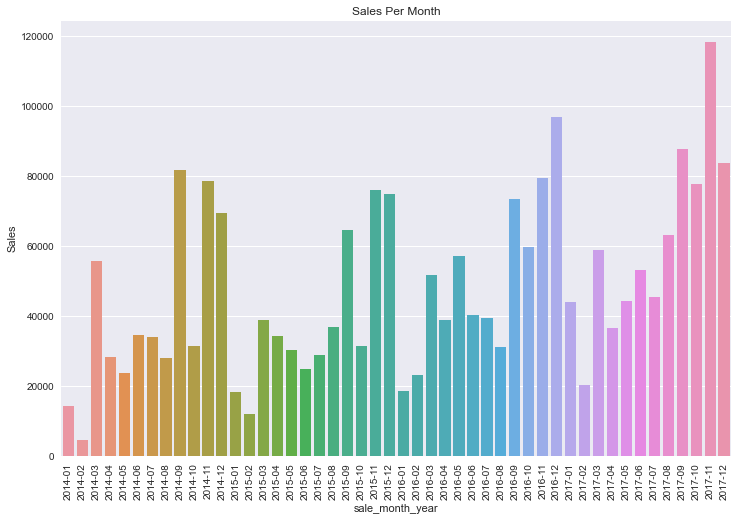

In [292]:
df["sale_month_year"] = df["Order Date"].dt.to_period("M")
spm_df = pd.DataFrame(df.groupby("sale_month_year")
                      [["Sales", "Profit"]].sum().reset_index())

plt.figure(figsize=(12,8))
sns.barplot(x="sale_month_year", y="Sales", data=spm_df)
plt.title("Sales Per Month")
plt.xticks(rotation=90);

## Profit Per Month

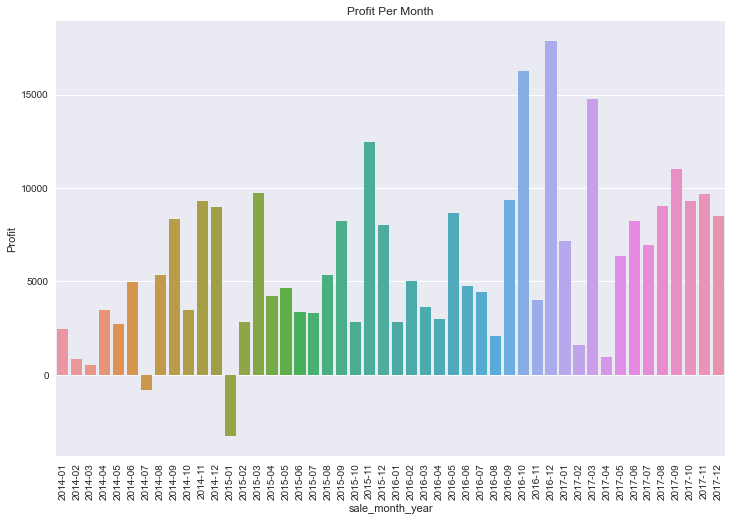

In [253]:
plt.figure(figsize=(12, 8))
sns.barplot(x="sale_month_year", y="Profit", data=spm_df)
plt.title("Profit Per Month")
plt.xticks(rotation=90);

## Sales by State

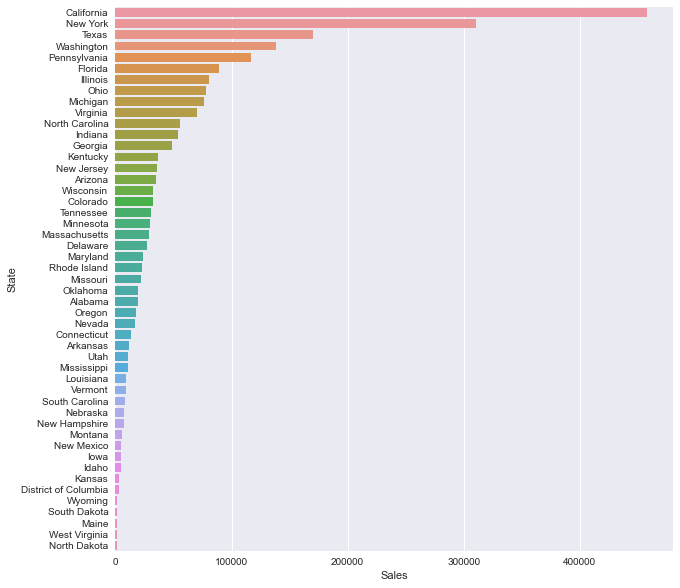

In [286]:
ss_df = df.groupby("State")[["Sales", "Profit"]].sum().reset_index().sort_values(by="Sales",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Sales", y="State", data=ss_df);

## Profit by States

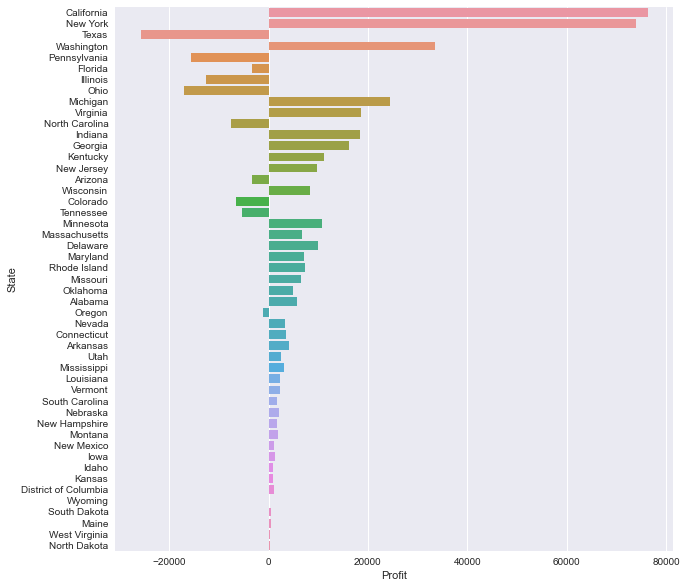

In [287]:
plt.figure(figsize=(10, 10))
sns.barplot(x="Profit", y="State", data=ss_df);

## Customer Segment

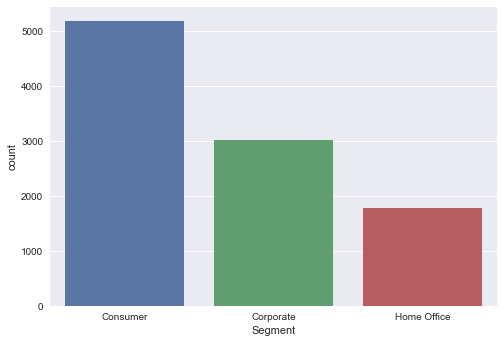

In [254]:
sns.countplot(x="Segment", data=df);

## Categories of the prodcuts

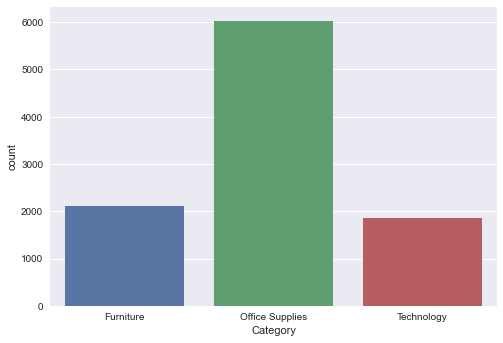

In [255]:
sns.countplot(x="Category", data=df);

## Sub Categories of prodcuts

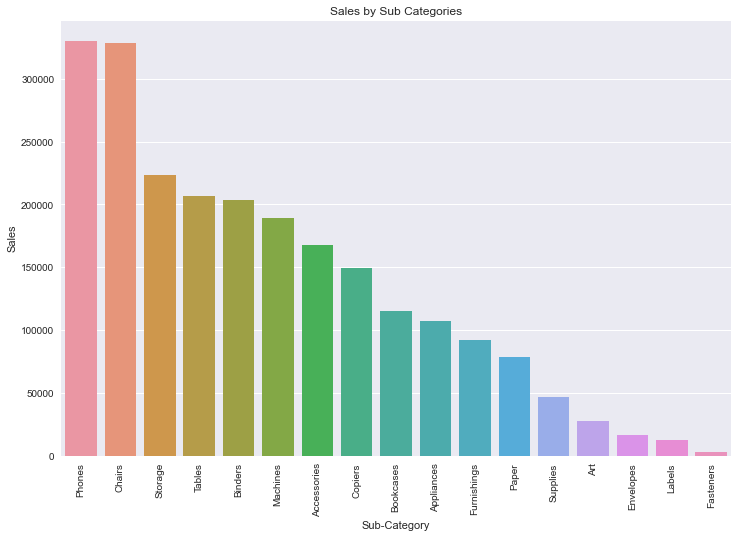

In [256]:
sub_cat_df = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x="Sub-Category", y="Sales", data=sub_cat_df)
plt.title("Sales by Sub Categories")
plt.xticks(rotation=90);


### Top 5 Phones by sales

In [281]:
df[df["Sub-Category"] == "Phones"].groupby("Product Name").sum().sort_values(by="Sales", ascending=False)[:5]

,Sales,Quantity,Discount,Profit
Product Name,,,,
Samsung Galaxy Mega 6.3,13943.668,39,0.8,1822.7566
Apple iPhone 5,12996.600,24,1.2,1611.5784
Wilson Electronics DB Pro Signal Booster,8878.400,32,2.2,515.5200
Mitel MiVoice 5330e IP Phone,7699.720,34,1.6,780.9716
Samsung Galaxy S III - 16GB - pebble blue (T-Mobile),7139.796,28,1.2,83.9976


## Sales and Profit by Region

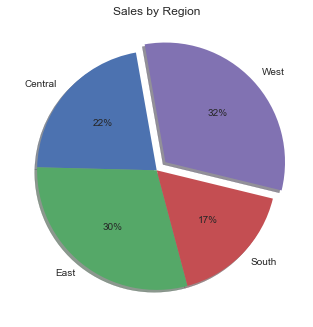

In [257]:
sales_rg = pd.DataFrame(df.groupby("Region")[["Sales", "Profit"]].sum().reset_index())
plt.title("Sales by Region")
explode = [0] * 4
explode[3] = 0.1
plt.pie(sales_rg["Sales"], explode=explode,labels=sales_rg["Region"], 
startangle=100,autopct="%1.0f%%", shadow=True);


## Profit By Region

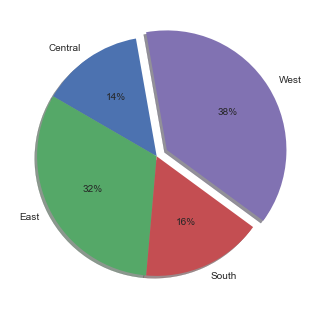

In [258]:
plt.pie(sales_rg["Profit"], explode=explode, labels=sales_rg["Region"],
        startangle=100, autopct="%1.0f%%", shadow=True);


## Sales Dashboard

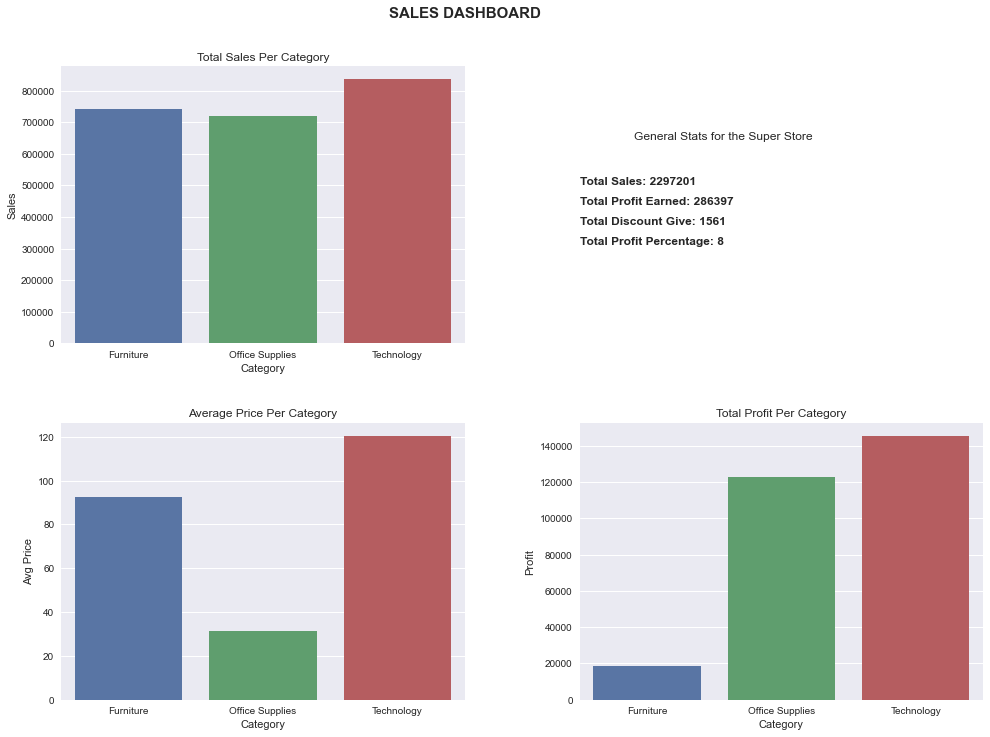

In [276]:
# creating the sale_df
sale_df = pd.DataFrame(df.groupby("Category")[
                       ["Sales", "Profit", "Quantity"]].sum().reset_index())
sale_df["Avg Price"] = sale_df["Sales"] / sale_df["Quantity"]
sale_df["Avg Profit"] = sale_df["Profit"] / sale_df["Quantity"]
sale_df["Profit Per"] = (sale_df["Avg Profit"] / sale_df["Avg Price"]) * 100


fig = plt.figure()
fig.suptitle(x=.7, y=1.75, t="SALES DASHBOARD", fontsize=15, fontweight="bold")

# adding ax
ax1 = fig.add_axes([0,0,.7,.7])
ax2 = fig.add_axes([.9, 0, .7, .7])
ax3 = fig.add_axes([0, 0.9, .7, .7])
ax4 = fig.add_axes([0.9, 0.9, .5, .5])


# sales in each category
sns.barplot(ax=ax3, x="Category", y="Sales", data=sale_df)
ax3.set_title("Total Sales Per Category")

# General Stats
ax4.axes.set_xticks([])
ax4.axes.set_yticks([])
ax4.axes.set_facecolor("white")
ax4.text(0, 0.8, "Total Sales: " + str(total_sales), fontweight="bold", fontsize=12)
ax4.text(0, 0.7, "Total Profit Earned: " + str(total_profit), fontweight="bold", fontsize=12)
ax4.text(0, 0.6, "Total Discount Give: " + str(total_discount), fontweight="bold", fontsize=12)
ax4.text(0, 0.5, "Total Profit Percentage: " + str(profit_per), fontweight="bold", fontsize=12)
ax4.set_title("General Stats for the Super Store")

# Percentage of pro
sns.barplot(ax=ax2, x="Category", y="Profit", data=sale_df)
ax2.set_title("Total Profit Per Category")

# Average Price of Prodcut Per Category
sns.barplot(ax=ax1, x="Category", y="Avg Price", data=sale_df)
ax1.set_title("Average Price Per Category");
